# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

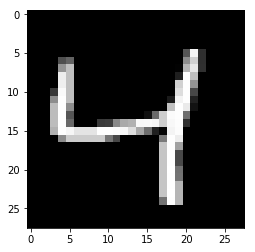

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
mnist.train.images.shape

(60000, 784)

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, [None, image_size], name='input')
targets_ = tf.placeholder(tf.float32, [None, image_size], name='target')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
lr = 0.01
opt = tf.train.AdamOptimizer(lr).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6930
Epoch: 1/20... Training loss: 0.6482
Epoch: 1/20... Training loss: 0.5544
Epoch: 1/20... Training loss: 0.4458
Epoch: 1/20... Training loss: 0.3713
Epoch: 1/20... Training loss: 0.3240
Epoch: 1/20... Training loss: 0.3093
Epoch: 1/20... Training loss: 0.3118
Epoch: 1/20... Training loss: 0.3240
Epoch: 1/20... Training loss: 0.3137
Epoch: 1/20... Training loss: 0.3020
Epoch: 1/20... Training loss: 0.2866
Epoch: 1/20... Training loss: 0.2965
Epoch: 1/20... Training loss: 0.2836
Epoch: 1/20... Training loss: 0.2876
Epoch: 1/20... Training loss: 0.2814
Epoch: 1/20... Training loss: 0.2718
Epoch: 1/20... Training loss: 0.2687
Epoch: 1/20... Training loss: 0.2644
Epoch: 1/20... Training loss: 0.2686
Epoch: 1/20... Training loss: 0.2579
Epoch: 1/20... Training loss: 0.2563
Epoch: 1/20... Training loss: 0.2522
Epoch: 1/20... Training loss: 0.2528
Epoch: 1/20... Training loss: 0.2505
Epoch: 1/20... Training loss: 0.2406
Epoch: 1/20... Training loss: 0.2386
E

Epoch: 1/20... Training loss: 0.1384
Epoch: 1/20... Training loss: 0.1379
Epoch: 1/20... Training loss: 0.1390
Epoch: 1/20... Training loss: 0.1371
Epoch: 1/20... Training loss: 0.1404
Epoch: 1/20... Training loss: 0.1393
Epoch: 1/20... Training loss: 0.1398
Epoch: 1/20... Training loss: 0.1363
Epoch: 1/20... Training loss: 0.1387
Epoch: 1/20... Training loss: 0.1370
Epoch: 1/20... Training loss: 0.1441
Epoch: 1/20... Training loss: 0.1385
Epoch: 1/20... Training loss: 0.1277
Epoch: 1/20... Training loss: 0.1349
Epoch: 1/20... Training loss: 0.1320
Epoch: 1/20... Training loss: 0.1367
Epoch: 1/20... Training loss: 0.1389
Epoch: 1/20... Training loss: 0.1370
Epoch: 1/20... Training loss: 0.1409
Epoch: 1/20... Training loss: 0.1379
Epoch: 1/20... Training loss: 0.1346
Epoch: 1/20... Training loss: 0.1381
Epoch: 1/20... Training loss: 0.1384
Epoch: 1/20... Training loss: 0.1349
Epoch: 1/20... Training loss: 0.1330
Epoch: 1/20... Training loss: 0.1386
Epoch: 1/20... Training loss: 0.1341
E

Epoch: 2/20... Training loss: 0.1250
Epoch: 2/20... Training loss: 0.1287
Epoch: 2/20... Training loss: 0.1274
Epoch: 2/20... Training loss: 0.1291
Epoch: 2/20... Training loss: 0.1290
Epoch: 2/20... Training loss: 0.1292
Epoch: 2/20... Training loss: 0.1266
Epoch: 2/20... Training loss: 0.1303
Epoch: 2/20... Training loss: 0.1241
Epoch: 2/20... Training loss: 0.1238
Epoch: 2/20... Training loss: 0.1248
Epoch: 2/20... Training loss: 0.1248
Epoch: 2/20... Training loss: 0.1301
Epoch: 2/20... Training loss: 0.1324
Epoch: 2/20... Training loss: 0.1303
Epoch: 2/20... Training loss: 0.1260
Epoch: 2/20... Training loss: 0.1284
Epoch: 2/20... Training loss: 0.1230
Epoch: 2/20... Training loss: 0.1258
Epoch: 2/20... Training loss: 0.1252
Epoch: 2/20... Training loss: 0.1241
Epoch: 2/20... Training loss: 0.1284
Epoch: 2/20... Training loss: 0.1254
Epoch: 2/20... Training loss: 0.1268
Epoch: 2/20... Training loss: 0.1263
Epoch: 2/20... Training loss: 0.1274
Epoch: 2/20... Training loss: 0.1245
E

Epoch: 3/20... Training loss: 0.1233
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1229
Epoch: 3/20... Training loss: 0.1251
Epoch: 3/20... Training loss: 0.1263
Epoch: 3/20... Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1225
Epoch: 3/20... Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1215
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1244
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1195
Epoch: 3/20... Training loss: 0.1231
Epoch: 3/20... Training loss: 0.1253
E

Epoch: 3/20... Training loss: 0.1251
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1195
Epoch: 3/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1322
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1301
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1252
E

Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1221
E

Epoch: 5/20... Training loss: 0.1279
Epoch: 5/20... Training loss: 0.1230
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1228
Epoch: 5/20... Training loss: 0.1242
Epoch: 5/20... Training loss: 0.1246
Epoch: 5/20... Training loss: 0.1249
Epoch: 5/20... Training loss: 0.1211
Epoch: 5/20... Training loss: 0.1259
Epoch: 5/20... Training loss: 0.1254
Epoch: 5/20... Training loss: 0.1227
Epoch: 5/20... Training loss: 0.1239
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1262
Epoch: 5/20... Training loss: 0.1272
Epoch: 5/20... Training loss: 0.1255
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1273
Epoch: 5/20... Training loss: 0.1225
Epoch: 5/20... Training loss: 0.1205
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1220
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1194
Epoch: 5/20... Training loss: 0.1207
Epoch: 5/20... Training loss: 0.1208
E

Epoch: 6/20... Training loss: 0.1248
Epoch: 6/20... Training loss: 0.1232
Epoch: 6/20... Training loss: 0.1235
Epoch: 6/20... Training loss: 0.1226
Epoch: 6/20... Training loss: 0.1243
Epoch: 6/20... Training loss: 0.1241
Epoch: 6/20... Training loss: 0.1219
Epoch: 6/20... Training loss: 0.1235
Epoch: 6/20... Training loss: 0.1265
Epoch: 6/20... Training loss: 0.1246
Epoch: 6/20... Training loss: 0.1238
Epoch: 6/20... Training loss: 0.1223
Epoch: 6/20... Training loss: 0.1203
Epoch: 6/20... Training loss: 0.1212
Epoch: 6/20... Training loss: 0.1233
Epoch: 6/20... Training loss: 0.1240
Epoch: 6/20... Training loss: 0.1223
Epoch: 6/20... Training loss: 0.1232
Epoch: 6/20... Training loss: 0.1211
Epoch: 6/20... Training loss: 0.1214
Epoch: 6/20... Training loss: 0.1230
Epoch: 6/20... Training loss: 0.1272
Epoch: 6/20... Training loss: 0.1317
Epoch: 6/20... Training loss: 0.1226
Epoch: 6/20... Training loss: 0.1238
Epoch: 6/20... Training loss: 0.1239
Epoch: 6/20... Training loss: 0.1227
E

Epoch: 7/20... Training loss: 0.1232
Epoch: 7/20... Training loss: 0.1241
Epoch: 7/20... Training loss: 0.1251
Epoch: 7/20... Training loss: 0.1197
Epoch: 7/20... Training loss: 0.1283
Epoch: 7/20... Training loss: 0.1211
Epoch: 7/20... Training loss: 0.1242
Epoch: 7/20... Training loss: 0.1261
Epoch: 7/20... Training loss: 0.1240
Epoch: 7/20... Training loss: 0.1246
Epoch: 7/20... Training loss: 0.1231
Epoch: 7/20... Training loss: 0.1233
Epoch: 7/20... Training loss: 0.1264
Epoch: 7/20... Training loss: 0.1259
Epoch: 7/20... Training loss: 0.1177
Epoch: 7/20... Training loss: 0.1231
Epoch: 7/20... Training loss: 0.1223
Epoch: 7/20... Training loss: 0.1209
Epoch: 7/20... Training loss: 0.1207
Epoch: 7/20... Training loss: 0.1225
Epoch: 7/20... Training loss: 0.1213
Epoch: 7/20... Training loss: 0.1253
Epoch: 7/20... Training loss: 0.1213
Epoch: 7/20... Training loss: 0.1162
Epoch: 7/20... Training loss: 0.1265
Epoch: 7/20... Training loss: 0.1202
Epoch: 7/20... Training loss: 0.1243
E

Epoch: 7/20... Training loss: 0.1258
Epoch: 7/20... Training loss: 0.1247
Epoch: 7/20... Training loss: 0.1254
Epoch: 7/20... Training loss: 0.1210
Epoch: 7/20... Training loss: 0.1270
Epoch: 7/20... Training loss: 0.1195
Epoch: 7/20... Training loss: 0.1204
Epoch: 7/20... Training loss: 0.1226
Epoch: 7/20... Training loss: 0.1237
Epoch: 7/20... Training loss: 0.1196
Epoch: 7/20... Training loss: 0.1231
Epoch: 7/20... Training loss: 0.1256
Epoch: 7/20... Training loss: 0.1227
Epoch: 7/20... Training loss: 0.1211
Epoch: 7/20... Training loss: 0.1201
Epoch: 7/20... Training loss: 0.1257
Epoch: 7/20... Training loss: 0.1192
Epoch: 7/20... Training loss: 0.1197
Epoch: 7/20... Training loss: 0.1233
Epoch: 7/20... Training loss: 0.1216
Epoch: 7/20... Training loss: 0.1246
Epoch: 7/20... Training loss: 0.1292
Epoch: 7/20... Training loss: 0.1250
Epoch: 7/20... Training loss: 0.1288
Epoch: 7/20... Training loss: 0.1210
Epoch: 7/20... Training loss: 0.1208
Epoch: 7/20... Training loss: 0.1270
E

Epoch: 8/20... Training loss: 0.1206
Epoch: 8/20... Training loss: 0.1198
Epoch: 8/20... Training loss: 0.1188
Epoch: 8/20... Training loss: 0.1207
Epoch: 8/20... Training loss: 0.1193
Epoch: 8/20... Training loss: 0.1249
Epoch: 8/20... Training loss: 0.1222
Epoch: 8/20... Training loss: 0.1234
Epoch: 8/20... Training loss: 0.1221
Epoch: 8/20... Training loss: 0.1222
Epoch: 8/20... Training loss: 0.1216
Epoch: 8/20... Training loss: 0.1238
Epoch: 8/20... Training loss: 0.1215
Epoch: 8/20... Training loss: 0.1160
Epoch: 8/20... Training loss: 0.1223
Epoch: 8/20... Training loss: 0.1242
Epoch: 8/20... Training loss: 0.1256
Epoch: 8/20... Training loss: 0.1238
Epoch: 8/20... Training loss: 0.1188
Epoch: 8/20... Training loss: 0.1197
Epoch: 8/20... Training loss: 0.1224
Epoch: 8/20... Training loss: 0.1207
Epoch: 8/20... Training loss: 0.1224
Epoch: 8/20... Training loss: 0.1224
Epoch: 8/20... Training loss: 0.1250
Epoch: 8/20... Training loss: 0.1235
Epoch: 8/20... Training loss: 0.1220
E

Epoch: 9/20... Training loss: 0.1249
Epoch: 9/20... Training loss: 0.1196
Epoch: 9/20... Training loss: 0.1166
Epoch: 9/20... Training loss: 0.1280
Epoch: 9/20... Training loss: 0.1219
Epoch: 9/20... Training loss: 0.1271
Epoch: 9/20... Training loss: 0.1214
Epoch: 9/20... Training loss: 0.1224
Epoch: 9/20... Training loss: 0.1251
Epoch: 9/20... Training loss: 0.1182
Epoch: 9/20... Training loss: 0.1263
Epoch: 9/20... Training loss: 0.1219
Epoch: 9/20... Training loss: 0.1206
Epoch: 9/20... Training loss: 0.1224
Epoch: 9/20... Training loss: 0.1247
Epoch: 9/20... Training loss: 0.1253
Epoch: 9/20... Training loss: 0.1233
Epoch: 9/20... Training loss: 0.1225
Epoch: 9/20... Training loss: 0.1257
Epoch: 9/20... Training loss: 0.1195
Epoch: 9/20... Training loss: 0.1243
Epoch: 9/20... Training loss: 0.1202
Epoch: 9/20... Training loss: 0.1203
Epoch: 9/20... Training loss: 0.1215
Epoch: 9/20... Training loss: 0.1239
Epoch: 9/20... Training loss: 0.1213
Epoch: 9/20... Training loss: 0.1255
E

Epoch: 10/20... Training loss: 0.1223
Epoch: 10/20... Training loss: 0.1200
Epoch: 10/20... Training loss: 0.1202
Epoch: 10/20... Training loss: 0.1226
Epoch: 10/20... Training loss: 0.1169
Epoch: 10/20... Training loss: 0.1207
Epoch: 10/20... Training loss: 0.1169
Epoch: 10/20... Training loss: 0.1242
Epoch: 10/20... Training loss: 0.1229
Epoch: 10/20... Training loss: 0.1177
Epoch: 10/20... Training loss: 0.1193
Epoch: 10/20... Training loss: 0.1262
Epoch: 10/20... Training loss: 0.1201
Epoch: 10/20... Training loss: 0.1177
Epoch: 10/20... Training loss: 0.1180
Epoch: 10/20... Training loss: 0.1250
Epoch: 10/20... Training loss: 0.1210
Epoch: 10/20... Training loss: 0.1190
Epoch: 10/20... Training loss: 0.1237
Epoch: 10/20... Training loss: 0.1232
Epoch: 10/20... Training loss: 0.1226
Epoch: 10/20... Training loss: 0.1250
Epoch: 10/20... Training loss: 0.1215
Epoch: 10/20... Training loss: 0.1199
Epoch: 10/20... Training loss: 0.1226
Epoch: 10/20... Training loss: 0.1185
Epoch: 10/20

Epoch: 10/20... Training loss: 0.1214
Epoch: 10/20... Training loss: 0.1211
Epoch: 10/20... Training loss: 0.1262
Epoch: 10/20... Training loss: 0.1247
Epoch: 10/20... Training loss: 0.1183
Epoch: 10/20... Training loss: 0.1267
Epoch: 10/20... Training loss: 0.1203
Epoch: 10/20... Training loss: 0.1208
Epoch: 10/20... Training loss: 0.1215
Epoch: 10/20... Training loss: 0.1178
Epoch: 10/20... Training loss: 0.1229
Epoch: 10/20... Training loss: 0.1220
Epoch: 10/20... Training loss: 0.1249
Epoch: 10/20... Training loss: 0.1185
Epoch: 10/20... Training loss: 0.1140
Epoch: 10/20... Training loss: 0.1263
Epoch: 10/20... Training loss: 0.1193
Epoch: 10/20... Training loss: 0.1299
Epoch: 10/20... Training loss: 0.1175
Epoch: 10/20... Training loss: 0.1203
Epoch: 10/20... Training loss: 0.1223
Epoch: 10/20... Training loss: 0.1200
Epoch: 10/20... Training loss: 0.1233
Epoch: 10/20... Training loss: 0.1261
Epoch: 10/20... Training loss: 0.1178
Epoch: 10/20... Training loss: 0.1215
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1162
Epoch: 11/20... Training loss: 0.1257
Epoch: 11/20... Training loss: 0.1221
Epoch: 11/20... Training loss: 0.1211
Epoch: 11/20... Training loss: 0.1196
Epoch: 11/20... Training loss: 0.1203
Epoch: 11/20... Training loss: 0.1290
Epoch: 11/20... Training loss: 0.1253
Epoch: 11/20... Training loss: 0.1220
Epoch: 11/20... Training loss: 0.1214
Epoch: 11/20... Training loss: 0.1199
Epoch: 11/20... Training loss: 0.1172
Epoch: 11/20... Training loss: 0.1235
Epoch: 11/20... Training loss: 0.1184
Epoch: 11/20... Training loss: 0.1209
Epoch: 11/20... Training loss: 0.1202
Epoch: 11/20... Training loss: 0.1221
Epoch: 11/20... Training loss: 0.1204
Epoch: 11/20... Training loss: 0.1222
Epoch: 11/20... Training loss: 0.1217
Epoch: 11/20... Training loss: 0.1204
Epoch: 11/20... Training loss: 0.1185
Epoch: 11/20... Training loss: 0.1210
Epoch: 11/20... Training loss: 0.1263
Epoch: 11/20... Training loss: 0.1244
Epoch: 11/20... Training loss: 0.1232
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1242
Epoch: 12/20... Training loss: 0.1242
Epoch: 12/20... Training loss: 0.1224
Epoch: 12/20... Training loss: 0.1218
Epoch: 12/20... Training loss: 0.1230
Epoch: 12/20... Training loss: 0.1268
Epoch: 12/20... Training loss: 0.1209
Epoch: 12/20... Training loss: 0.1215
Epoch: 12/20... Training loss: 0.1236
Epoch: 12/20... Training loss: 0.1223
Epoch: 12/20... Training loss: 0.1249
Epoch: 12/20... Training loss: 0.1202
Epoch: 12/20... Training loss: 0.1262
Epoch: 12/20... Training loss: 0.1270
Epoch: 12/20... Training loss: 0.1249
Epoch: 12/20... Training loss: 0.1204
Epoch: 12/20... Training loss: 0.1250
Epoch: 12/20... Training loss: 0.1204
Epoch: 12/20... Training loss: 0.1235
Epoch: 12/20... Training loss: 0.1243
Epoch: 12/20... Training loss: 0.1209
Epoch: 12/20... Training loss: 0.1256
Epoch: 12/20... Training loss: 0.1152
Epoch: 12/20... Training loss: 0.1211
Epoch: 12/20... Training loss: 0.1212
Epoch: 12/20... Training loss: 0.1242
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1190
Epoch: 13/20... Training loss: 0.1175
Epoch: 13/20... Training loss: 0.1189
Epoch: 13/20... Training loss: 0.1179
Epoch: 13/20... Training loss: 0.1260
Epoch: 13/20... Training loss: 0.1181
Epoch: 13/20... Training loss: 0.1242
Epoch: 13/20... Training loss: 0.1240
Epoch: 13/20... Training loss: 0.1201
Epoch: 13/20... Training loss: 0.1239
Epoch: 13/20... Training loss: 0.1239
Epoch: 13/20... Training loss: 0.1190
Epoch: 13/20... Training loss: 0.1253
Epoch: 13/20... Training loss: 0.1232
Epoch: 13/20... Training loss: 0.1259
Epoch: 13/20... Training loss: 0.1171
Epoch: 13/20... Training loss: 0.1223
Epoch: 13/20... Training loss: 0.1227
Epoch: 13/20... Training loss: 0.1234
Epoch: 13/20... Training loss: 0.1158
Epoch: 13/20... Training loss: 0.1251
Epoch: 13/20... Training loss: 0.1239
Epoch: 13/20... Training loss: 0.1196
Epoch: 13/20... Training loss: 0.1249
Epoch: 13/20... Training loss: 0.1217
Epoch: 13/20... Training loss: 0.1239
Epoch: 13/20

Epoch: 13/20... Training loss: 0.1242
Epoch: 13/20... Training loss: 0.1196
Epoch: 13/20... Training loss: 0.1233
Epoch: 13/20... Training loss: 0.1249
Epoch: 13/20... Training loss: 0.1246
Epoch: 13/20... Training loss: 0.1215
Epoch: 13/20... Training loss: 0.1286
Epoch: 13/20... Training loss: 0.1234
Epoch: 13/20... Training loss: 0.1229
Epoch: 13/20... Training loss: 0.1330
Epoch: 13/20... Training loss: 0.1189
Epoch: 13/20... Training loss: 0.1221
Epoch: 13/20... Training loss: 0.1208
Epoch: 13/20... Training loss: 0.1258
Epoch: 13/20... Training loss: 0.1228
Epoch: 13/20... Training loss: 0.1222
Epoch: 13/20... Training loss: 0.1195
Epoch: 13/20... Training loss: 0.1227
Epoch: 13/20... Training loss: 0.1274
Epoch: 13/20... Training loss: 0.1199
Epoch: 13/20... Training loss: 0.1195
Epoch: 13/20... Training loss: 0.1214
Epoch: 13/20... Training loss: 0.1262
Epoch: 13/20... Training loss: 0.1277
Epoch: 13/20... Training loss: 0.1231
Epoch: 13/20... Training loss: 0.1186
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1250
Epoch: 14/20... Training loss: 0.1222
Epoch: 14/20... Training loss: 0.1285
Epoch: 14/20... Training loss: 0.1195
Epoch: 14/20... Training loss: 0.1193
Epoch: 14/20... Training loss: 0.1257
Epoch: 14/20... Training loss: 0.1157
Epoch: 14/20... Training loss: 0.1198
Epoch: 14/20... Training loss: 0.1208
Epoch: 14/20... Training loss: 0.1236
Epoch: 14/20... Training loss: 0.1229
Epoch: 14/20... Training loss: 0.1196
Epoch: 14/20... Training loss: 0.1199
Epoch: 14/20... Training loss: 0.1236
Epoch: 14/20... Training loss: 0.1202
Epoch: 14/20... Training loss: 0.1233
Epoch: 14/20... Training loss: 0.1193
Epoch: 14/20... Training loss: 0.1192
Epoch: 14/20... Training loss: 0.1229
Epoch: 14/20... Training loss: 0.1223
Epoch: 14/20... Training loss: 0.1283
Epoch: 14/20... Training loss: 0.1202
Epoch: 14/20... Training loss: 0.1173
Epoch: 14/20... Training loss: 0.1238
Epoch: 14/20... Training loss: 0.1250
Epoch: 14/20... Training loss: 0.1245
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1209
Epoch: 15/20... Training loss: 0.1180
Epoch: 15/20... Training loss: 0.1206
Epoch: 15/20... Training loss: 0.1153
Epoch: 15/20... Training loss: 0.1191
Epoch: 15/20... Training loss: 0.1203
Epoch: 15/20... Training loss: 0.1228
Epoch: 15/20... Training loss: 0.1187
Epoch: 15/20... Training loss: 0.1256
Epoch: 15/20... Training loss: 0.1285
Epoch: 15/20... Training loss: 0.1171
Epoch: 15/20... Training loss: 0.1249
Epoch: 15/20... Training loss: 0.1187
Epoch: 15/20... Training loss: 0.1229
Epoch: 15/20... Training loss: 0.1231
Epoch: 15/20... Training loss: 0.1206
Epoch: 15/20... Training loss: 0.1270
Epoch: 15/20... Training loss: 0.1218
Epoch: 15/20... Training loss: 0.1188
Epoch: 15/20... Training loss: 0.1244
Epoch: 15/20... Training loss: 0.1227
Epoch: 15/20... Training loss: 0.1213
Epoch: 15/20... Training loss: 0.1250
Epoch: 15/20... Training loss: 0.1226
Epoch: 15/20... Training loss: 0.1192
Epoch: 15/20... Training loss: 0.1207
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1200
Epoch: 16/20... Training loss: 0.1250
Epoch: 16/20... Training loss: 0.1243
Epoch: 16/20... Training loss: 0.1232
Epoch: 16/20... Training loss: 0.1273
Epoch: 16/20... Training loss: 0.1173
Epoch: 16/20... Training loss: 0.1193
Epoch: 16/20... Training loss: 0.1195
Epoch: 16/20... Training loss: 0.1200
Epoch: 16/20... Training loss: 0.1243
Epoch: 16/20... Training loss: 0.1213
Epoch: 16/20... Training loss: 0.1245
Epoch: 16/20... Training loss: 0.1247
Epoch: 16/20... Training loss: 0.1219
Epoch: 16/20... Training loss: 0.1180
Epoch: 16/20... Training loss: 0.1184
Epoch: 16/20... Training loss: 0.1196
Epoch: 16/20... Training loss: 0.1237
Epoch: 16/20... Training loss: 0.1265
Epoch: 16/20... Training loss: 0.1186
Epoch: 16/20... Training loss: 0.1210
Epoch: 16/20... Training loss: 0.1231
Epoch: 16/20... Training loss: 0.1185
Epoch: 16/20... Training loss: 0.1176
Epoch: 16/20... Training loss: 0.1246
Epoch: 16/20... Training loss: 0.1226
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1212
Epoch: 16/20... Training loss: 0.1204
Epoch: 16/20... Training loss: 0.1208
Epoch: 16/20... Training loss: 0.1173
Epoch: 16/20... Training loss: 0.1242
Epoch: 16/20... Training loss: 0.1210
Epoch: 16/20... Training loss: 0.1209
Epoch: 16/20... Training loss: 0.1218
Epoch: 16/20... Training loss: 0.1205
Epoch: 16/20... Training loss: 0.1188
Epoch: 16/20... Training loss: 0.1234
Epoch: 16/20... Training loss: 0.1222
Epoch: 16/20... Training loss: 0.1255
Epoch: 16/20... Training loss: 0.1240
Epoch: 16/20... Training loss: 0.1222
Epoch: 16/20... Training loss: 0.1200
Epoch: 16/20... Training loss: 0.1254
Epoch: 16/20... Training loss: 0.1219
Epoch: 16/20... Training loss: 0.1198
Epoch: 16/20... Training loss: 0.1204
Epoch: 16/20... Training loss: 0.1217
Epoch: 16/20... Training loss: 0.1237
Epoch: 16/20... Training loss: 0.1244
Epoch: 16/20... Training loss: 0.1208
Epoch: 16/20... Training loss: 0.1167
Epoch: 16/20... Training loss: 0.1170
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1173
Epoch: 17/20... Training loss: 0.1190
Epoch: 17/20... Training loss: 0.1212
Epoch: 17/20... Training loss: 0.1237
Epoch: 17/20... Training loss: 0.1249
Epoch: 17/20... Training loss: 0.1230
Epoch: 17/20... Training loss: 0.1212
Epoch: 17/20... Training loss: 0.1189
Epoch: 17/20... Training loss: 0.1243
Epoch: 17/20... Training loss: 0.1235
Epoch: 17/20... Training loss: 0.1228
Epoch: 17/20... Training loss: 0.1191
Epoch: 17/20... Training loss: 0.1205
Epoch: 17/20... Training loss: 0.1199
Epoch: 17/20... Training loss: 0.1240
Epoch: 17/20... Training loss: 0.1225
Epoch: 17/20... Training loss: 0.1202
Epoch: 17/20... Training loss: 0.1254
Epoch: 17/20... Training loss: 0.1206
Epoch: 17/20... Training loss: 0.1252
Epoch: 17/20... Training loss: 0.1220
Epoch: 17/20... Training loss: 0.1221
Epoch: 17/20... Training loss: 0.1217
Epoch: 17/20... Training loss: 0.1220
Epoch: 17/20... Training loss: 0.1196
Epoch: 17/20... Training loss: 0.1248
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1191
Epoch: 18/20... Training loss: 0.1205
Epoch: 18/20... Training loss: 0.1230
Epoch: 18/20... Training loss: 0.1170
Epoch: 18/20... Training loss: 0.1193
Epoch: 18/20... Training loss: 0.1227
Epoch: 18/20... Training loss: 0.1195
Epoch: 18/20... Training loss: 0.1238
Epoch: 18/20... Training loss: 0.1212
Epoch: 18/20... Training loss: 0.1196
Epoch: 18/20... Training loss: 0.1174
Epoch: 18/20... Training loss: 0.1161
Epoch: 18/20... Training loss: 0.1253
Epoch: 18/20... Training loss: 0.1212
Epoch: 18/20... Training loss: 0.1187
Epoch: 18/20... Training loss: 0.1276
Epoch: 18/20... Training loss: 0.1178
Epoch: 18/20... Training loss: 0.1213
Epoch: 18/20... Training loss: 0.1201
Epoch: 18/20... Training loss: 0.1229
Epoch: 18/20... Training loss: 0.1187
Epoch: 18/20... Training loss: 0.1241
Epoch: 18/20... Training loss: 0.1227
Epoch: 18/20... Training loss: 0.1178
Epoch: 18/20... Training loss: 0.1199
Epoch: 18/20... Training loss: 0.1177
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1182
Epoch: 19/20... Training loss: 0.1201
Epoch: 19/20... Training loss: 0.1205
Epoch: 19/20... Training loss: 0.1213
Epoch: 19/20... Training loss: 0.1240
Epoch: 19/20... Training loss: 0.1241
Epoch: 19/20... Training loss: 0.1177
Epoch: 19/20... Training loss: 0.1183
Epoch: 19/20... Training loss: 0.1217
Epoch: 19/20... Training loss: 0.1200
Epoch: 19/20... Training loss: 0.1207
Epoch: 19/20... Training loss: 0.1169
Epoch: 19/20... Training loss: 0.1197
Epoch: 19/20... Training loss: 0.1196
Epoch: 19/20... Training loss: 0.1176
Epoch: 19/20... Training loss: 0.1245
Epoch: 19/20... Training loss: 0.1217
Epoch: 19/20... Training loss: 0.1194
Epoch: 19/20... Training loss: 0.1175
Epoch: 19/20... Training loss: 0.1244
Epoch: 19/20... Training loss: 0.1206
Epoch: 19/20... Training loss: 0.1205
Epoch: 19/20... Training loss: 0.1205
Epoch: 19/20... Training loss: 0.1183
Epoch: 19/20... Training loss: 0.1229
Epoch: 19/20... Training loss: 0.1185
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1185
Epoch: 19/20... Training loss: 0.1202
Epoch: 19/20... Training loss: 0.1263
Epoch: 19/20... Training loss: 0.1241
Epoch: 19/20... Training loss: 0.1186
Epoch: 19/20... Training loss: 0.1224
Epoch: 19/20... Training loss: 0.1245
Epoch: 19/20... Training loss: 0.1241
Epoch: 19/20... Training loss: 0.1203
Epoch: 19/20... Training loss: 0.1146
Epoch: 19/20... Training loss: 0.1215
Epoch: 19/20... Training loss: 0.1244
Epoch: 19/20... Training loss: 0.1219
Epoch: 19/20... Training loss: 0.1211
Epoch: 19/20... Training loss: 0.1204
Epoch: 19/20... Training loss: 0.1226
Epoch: 19/20... Training loss: 0.1225
Epoch: 19/20... Training loss: 0.1185
Epoch: 19/20... Training loss: 0.1257
Epoch: 19/20... Training loss: 0.1268
Epoch: 19/20... Training loss: 0.1222
Epoch: 19/20... Training loss: 0.1206
Epoch: 19/20... Training loss: 0.1239
Epoch: 19/20... Training loss: 0.1245
Epoch: 19/20... Training loss: 0.1209
Epoch: 19/20... Training loss: 0.1234
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1267
Epoch: 20/20... Training loss: 0.1223
Epoch: 20/20... Training loss: 0.1234
Epoch: 20/20... Training loss: 0.1229
Epoch: 20/20... Training loss: 0.1189
Epoch: 20/20... Training loss: 0.1254
Epoch: 20/20... Training loss: 0.1273
Epoch: 20/20... Training loss: 0.1239
Epoch: 20/20... Training loss: 0.1225
Epoch: 20/20... Training loss: 0.1183
Epoch: 20/20... Training loss: 0.1178
Epoch: 20/20... Training loss: 0.1212
Epoch: 20/20... Training loss: 0.1167
Epoch: 20/20... Training loss: 0.1211
Epoch: 20/20... Training loss: 0.1227
Epoch: 20/20... Training loss: 0.1186
Epoch: 20/20... Training loss: 0.1229
Epoch: 20/20... Training loss: 0.1234
Epoch: 20/20... Training loss: 0.1232
Epoch: 20/20... Training loss: 0.1205
Epoch: 20/20... Training loss: 0.1231
Epoch: 20/20... Training loss: 0.1206
Epoch: 20/20... Training loss: 0.1217
Epoch: 20/20... Training loss: 0.1189
Epoch: 20/20... Training loss: 0.1200
Epoch: 20/20... Training loss: 0.1181
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

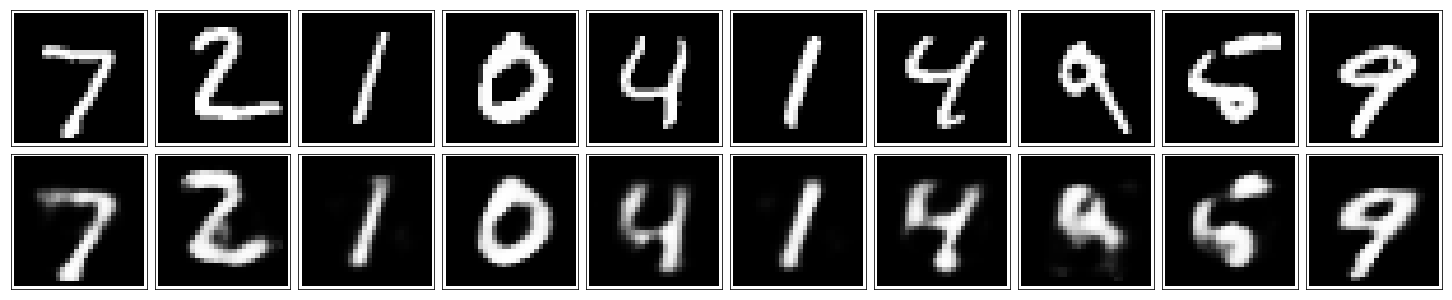

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [10]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.